In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
import json
import pandas as pd
import pprint

## 1) EXTRACTING SONG IDs

In [2]:
# compile song_extract.ipynb into a sexy loop to extract a 1000 songs
# OR
# noob way =  run the code 10 times, join all the dataframes together to get a 1000 songs

### 1.a) Creating Dataframe of audio_features

In [20]:
df_test1=pd.DataFrame(df_hits_du_moment)

In [21]:
basic_stats=pd.DataFrame(df_test1.describe())

In [22]:
basic_stats

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.686340,0.676560,-5.779300,0.083190,0.238533,0.015926,0.164198,0.538922,119.658460,188701.460000
std,0.107184,0.154275,1.694057,0.070130,0.245636,0.074019,0.141057,0.210573,23.080754,28138.362898
min,0.468000,0.276000,-9.475000,0.028500,0.000525,0.000000,0.032200,0.095100,66.900000,134972.000000
25%,0.603750,0.567500,-7.061000,0.043050,0.033075,0.000000,0.091275,0.383000,105.013500,172806.750000
50%,0.704000,0.683500,-5.626000,0.063100,0.160500,0.000001,0.111000,0.520500,121.047000,186935.000000
75%,0.738500,0.788750,-4.644000,0.084775,0.379250,0.000023,0.188000,0.683000,128.046750,207370.250000
max,0.954000,0.957000,-1.248000,0.325000,0.901000,0.382000,0.797000,0.960000,179.974000,268235.000000


## 2) CLUSTERING SONGS

In [23]:
import numpy as np
from plotly import express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [26]:
df_test1.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id',
       'duration_ms'],
      dtype='object')

In [29]:
scaler = StandardScaler()
df_test1_norm = scaler.fit_transform(df_test1[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']])
df_test1_norm # X_normalized

array([[-4.74426569e-01,  1.26004794e+00,  2.92361962e-01,
        -6.04821268e-01, -8.25491364e-01,  3.91320361e-01,
        -5.97237768e-01, -1.11736365e+00,  1.02204752e+00,
        -7.91748631e-02],
       [-1.33205108e+00,  6.70750941e-01, -2.71730259e-01,
        -1.16527841e-01,  1.83719573e-02, -2.17325309e-01,
        -2.95031074e-01, -1.13175513e+00,  1.32801570e+00,
        -1.91217134e-01],
       [ 9.95786875e-01, -1.13642653e+00, -1.35042247e+00,
        -2.96577040e-01, -8.29192519e-01, -2.09569019e-01,
        -4.89102197e-01, -7.57576798e-01, -8.61685354e-01,
        -1.29541831e-01],
       [ 2.70104598e-01, -3.70340426e-01, -1.34583102e-01,
        -5.01112930e-01,  7.33928575e-01, -2.17347964e-01,
        -5.87211953e-01, -1.76018284e+00, -9.50092696e-01,
         1.17816846e+00],
       [ 4.77442392e-01,  1.63981712e+00,  1.06098234e+00,
        -5.63049854e-01, -9.00748181e-01, -2.13554022e-01,
         2.34904833e-01,  1.25243244e+00,  2.78200399e-01,
        -5.

In [30]:
cluster_ids = KMeans(n_clusters=6, n_init=10).fit_predict(df_test1_norm)

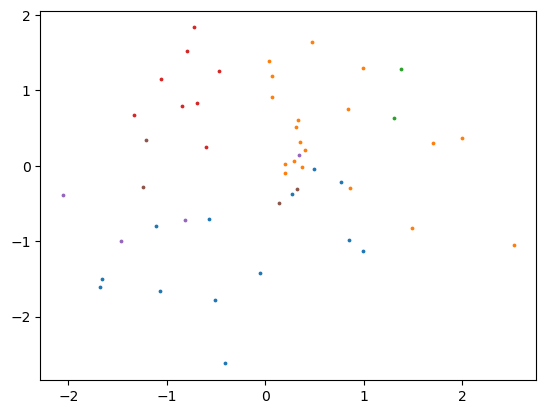

In [31]:
for c in np.unique(cluster_ids):
    plt.scatter(df_test1_norm[cluster_ids == c, 0], df_test1_norm[cluster_ids == c, 1], marker='.', s=12)

## 3) Analyse user input and sort it in relevant cluster

In [ ]:
# take the user input and process it like them other tracks we extracted.

## 4) Return a song recommendation from same cluster & puts in a player  
# AND PLAYS IT !

In [1]:
# sexy magic code loop to retrieve a random song from the cluster in which the user input was placed.